In [47]:
###import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline

In [48]:
###read file from my computer file that installed from Kaggle
read = pd.read_csv("Waiter's tips.csv")
read



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Descriping the data:
- total_bill is the total bill of each table without tip
- tip is the tip is given from one table
- sex is the sex of payer's tip
- smoker is the smoking status of buyer is smoker or not
- day is the day of paying the tip 
- time is the time of paying the tip(Dinner, Lunch)
- size is number of people of each table that was taken the tip from


In [49]:
### data type of each column
read.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [50]:
#check if data have null value
read.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No It doesn't have any null value

Data exploration

In [51]:
read.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [52]:
read.shape

(244, 7)

In [53]:
#count of unique value in each column 
read.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [11]:
#Descripe the data (Statistical information)
read.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
#count each value in each column 
features = read.columns
for feature in features:
    print(f"__{feature}__\n")
    print(read[feature].value_counts())
    print("_______________________________________________\n")

__total_bill__

13.42    3
10.33    2
20.29    2
18.29    2
17.92    2
        ..
30.40    1
26.59    1
19.65    1
9.55     1
5.75     1
Name: total_bill, Length: 229, dtype: int64
_______________________________________________

__tip__

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
2.83     1
1.58     1
3.71     1
3.35     1
2.18     1
Name: tip, Length: 123, dtype: int64
_______________________________________________

__sex__

Male      157
Female     87
Name: sex, dtype: int64
_______________________________________________

__smoker__

No     151
Yes     93
Name: smoker, dtype: int64
_______________________________________________

__day__

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
_______________________________________________

__time__

Dinner    176
Lunch      68
Name: time, dtype: int64
_______________________________________________

__size__

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64
_______

We can figure out that:
- almost clints give 2 dollar as a tip
- number of male is greater than female
- number of clints on Saturday are the greatest other days
- rush time is at dinner

In [14]:
read.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

who's pay more female or male?
smoker or not
smoker with gender
the biggest day 
which time of each day

correlation:
size with tip
total bill with tip 
tip with size

#the number of male is greater than female, so we need 
244
male=64%>>> 66%
female=36%>>> 34%


Text(0, 0.5, 'tip')

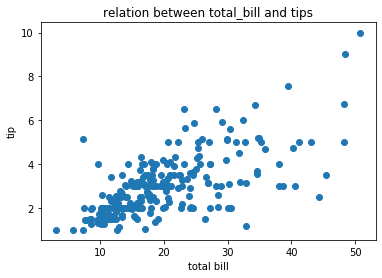

In [15]:
#coorelattion between total_bill and tip
tb = read['total_bill']
t = read['tip']

plt.scatter(tb,t)
plt.title('relation between total_bill and tips', fontsize=12)
plt.xlabel("total bill", fontsize=10)
plt.ylabel('tip', fontsize=10)


As we see we find 

Text(0, 0.5, 'smoker or not')

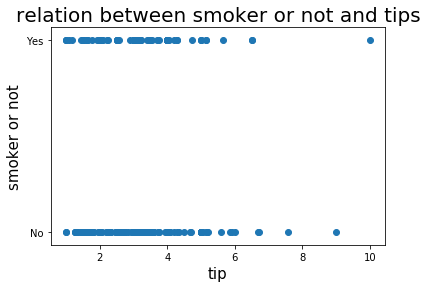

In [17]:
s = read['smoker']
t = read['tip']

plt.scatter(t, s)
plt.title('relation between smoker or not and tips', fontsize=20)
plt.xlabel("tip", fontsize=15)
plt.ylabel('smoker or not', fontsize=15)


Text(0, 0.5, 'smoker or not')

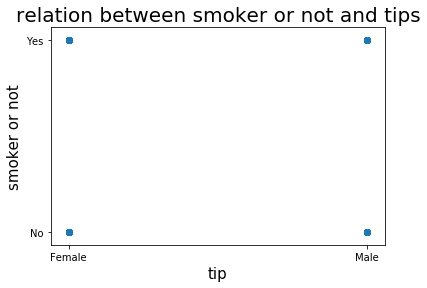

In [18]:
s = read['smoker']
t = read['sex']

plt.scatter(t, s)
plt.title('relation between smoker or not and tips', fontsize=20)
plt.xlabel("tip", fontsize=15)
plt.ylabel('smoker or not', fontsize=15)


In [19]:
read['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [23]:
read.groupby('day').count()


,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [115]:
read_wo_time = read.drop(['time'], axis = 1) 

In [116]:
read_wo_time

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4
...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,3
240,27.18,2.00,Female,Yes,Sat,2
241,22.67,2.00,Male,Yes,Sat,2
242,17.82,1.75,Male,No,Sat,2


In [45]:
cleanup_nums = {"smoker": {"No": 0, "Yes": 1},
                "day": {"Sat": 1, "Sun": 2, "Thur": 3, "Fri": 4},
                 "sex": {"Female": 10, "Male": 20}}
cleanup_nums

{'smoker': {'No': 0, 'Yes': 1},
 'day': {'Sat': 1, 'Sun': 2, 'Thur': 3, 'Fri': 4},
 'sex': {'Female': 10, 'Male': 20}}

In [46]:
ds = read.replace(cleanup_nums, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [119]:
read_wo_time

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,10,0,2,2
1,10.34,1.66,20,0,2,3
2,21.01,3.50,20,0,2,3
3,23.68,3.31,20,0,2,2
4,24.59,3.61,10,0,2,4
...,...,...,...,...,...,...
239,29.03,5.92,20,0,1,3
240,27.18,2.00,10,1,1,2
241,22.67,2.00,20,1,1,2
242,17.82,1.75,20,0,1,2


In [138]:
o = np.corrcoef(read_wo_time)

In [123]:
np.random.seed(1)

day = read_wo_time['day']

sex = read_wo_time['sex']

tip = read_wo_time['tip']
smoker = read_wo_time['smoker']

total_bill = read_wo_time['total_bill']


In [124]:
tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [88]:
np.corrcoef(day, sex)

array([[ 1.        , -0.15496454],
       [-0.15496454,  1.        ]])

In [125]:
np.corrcoef(day, tip)

array([[ 1.        , -0.07314297],
       [-0.07314297,  1.        ]])

In [126]:
np.corrcoef(total_bill, tip)

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [1]:
read.groupby('day').count()

NameError: name 'read' is not defined

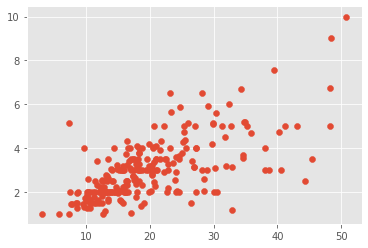

In [128]:
plt.style.use('ggplot')

plt.scatter(total_bill, tip)
plt.show()

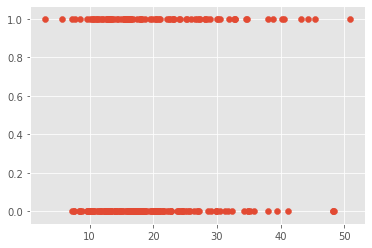

In [132]:
plt.style.use('ggplot')

plt.scatter(total_bill, smoker)
plt.show()

In [143]:
np.corrcoef(total_bill, smoker)

array([[1.        , 0.08572126],
       [0.08572126, 1.        ]])

In [25]:
print(max(read['total_bill']))
print(min(read['total_bill']))

50.81
3.07


total_bill[ total_bill<5] = 0
total_bill[ (5<total_bill) & (total_bill<=10) ] = 1
total_bill[ (10<total_bill) & (total_bill<=15) ] = 2
total_bill[ (15<total_bill) & (total_bill<=20) ] = 3
total_bill[ (20<total_bill) & (total_bill<=30) ] = 4
total_bill[ (30<total_bill) & (total_bill<=40) ] = 5
total_bill[ (40<total_bill) & (total_bill<=50) ] = 6


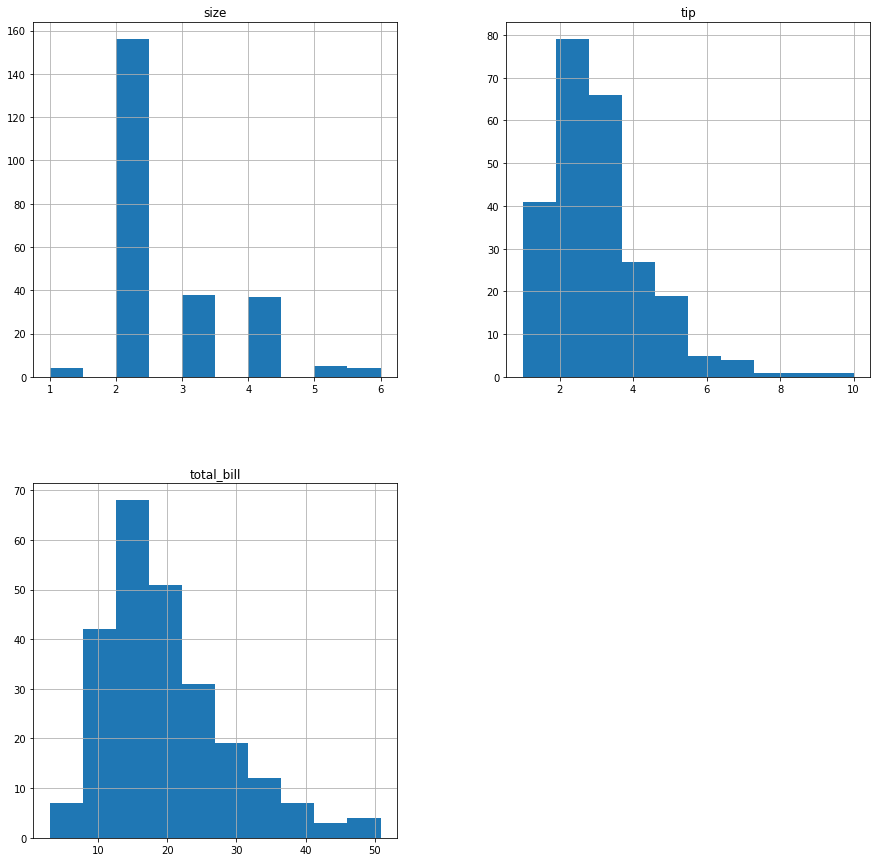

In [36]:
read.hist(figsize=(15,15));

In [183]:
#count of total "Total_bill"
r = read_wo_time["total_bill"].count()
#number of people pay tips more than thier total_bill
re = read_wo_time["total_bill"] < read_wo_time["tip"]
np.sum(read_wo_time["total_bill"] < read_wo_time["tip"]) 


88

In [32]:
np.sum(read["total_bill"] < read["tip"])


0

In [185]:
read_wo_time["total_bill"].count()

244

In [31]:
np.sum(read["total_bill"] == read["tip"])

0

In [34]:
np.sum(read["total_bill"] > read["tip"])


244

In [197]:
#ratio of tip from total_bill
round(read_wo_time["tip"] / read_wo_time["total_bill"] *100)



0       34.0
1       83.0
2       88.0
3       83.0
4       90.0
       ...  
239    148.0
240     50.0
241     50.0
242     58.0
243    100.0
Length: 244, dtype: float64

In [35]:
read

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
